Epoch 1/10
13/13 [==============================] - 2s 38ms/step - loss: 0.9074 - accuracy: 0.5012 - val_loss: 0.6500 - val_accuracy: 0.7174
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6013 - accuracy: 0.6993 - val_loss: 0.4312 - val_accuracy: 0.8261
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4334 - accuracy: 0.8093 - val_loss: 0.3146 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3344 - accuracy: 0.8680 - val_loss: 0.2507 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2771 - accuracy: 0.9071 - val_loss: 0.2100 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2353 - accuracy: 0.9242 - val_loss: 0.1858 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 0.2050 - accuracy: 0.9389 - val_loss: 0.1690 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

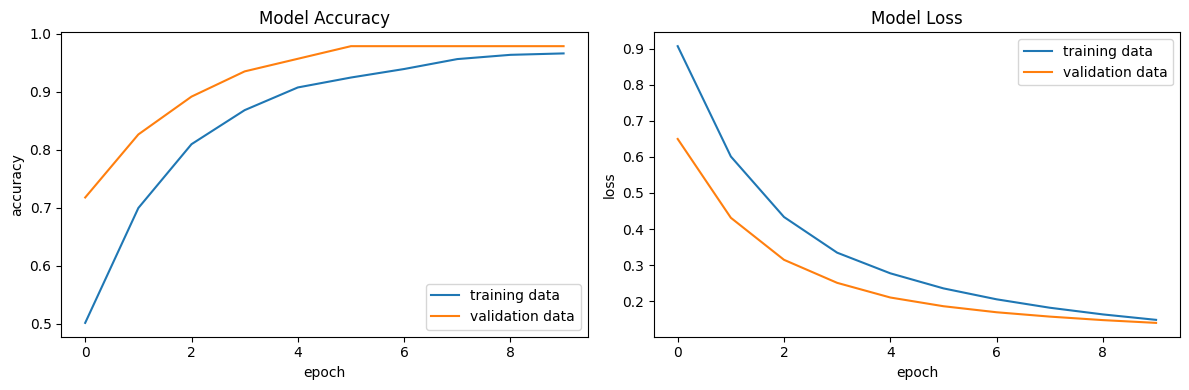

4/4 [==============================] - 0s 5ms/step - loss: 0.1372 - accuracy: 0.9649
Test Accuracy: 0.9649
1/1 [==============================] - 0s 75ms/step


c:\Users\Sohard\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'OK'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import easygui
import tensorflow as tf
from tensorflow import keras

# Load breast cancer dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
df['label'] = breast_cancer_dataset.target

# Separate features and target

X = df.drop(columns='label', axis=1)
y = df['label']

# Split data into training and testing sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Build the TensorFlow model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

# Plot model accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Function to get input from user using EasyGUI
def get_input_from_gui():
    input_str = easygui.enterbox("Enter patient data separated by commas (features):", "Breast Cancer Prediction")
    values = input_str.split(',')
    values = [float(value) for value in values]
    return np.array(values)

# Make predictions

input_data = get_input_from_gui()
input_data_reshaped = input_data.reshape(1, -1)
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
prediction_label = np.argmax(prediction)

# Display prediction result
if prediction_label == 0:
    result_msg = 'The tumor is Malignant and Patient is having Breast Cancer'
else:
    result_msg = 'The tumor is Benign and Patient is not having Breast Cancer'

easygui.msgbox(result_msg, "Prediction Result")
